In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os
from scipy.stats import chi2_contingency
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc


import warnings
warnings.filterwarnings("ignore")

In [31]:
df_train = pd.read_pickle('./data/df_train_dt.pkl')
df_test = pd.read_pickle('./data/df_test_dt.pkl')

# Assign Target and Features

In [32]:
X_train = df_train.drop("churn_risk_score", axis = 1)
y_train = df_train["churn_risk_score"]

X_test = df_test.drop("churn_risk_score", axis = 1)
y_test = df_test["churn_risk_score"]

In [33]:
#X_train_train = X_train.astype(float)
y_train = y_train.astype(int)

y_test = y_test.astype(int)

In [34]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Prediction on test data

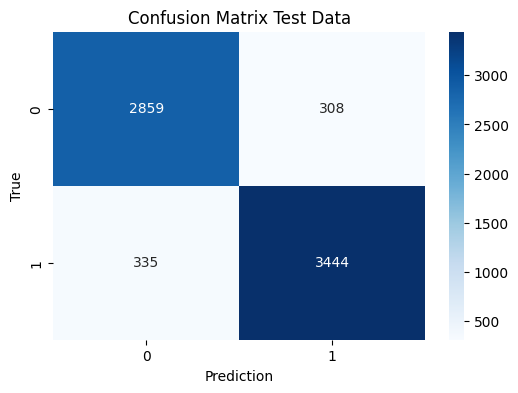

In [35]:
# Make predictions for test set
y_pred = clf.predict(X_test)

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=True)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix Test Data')
plt.show()

## Prediction on train data

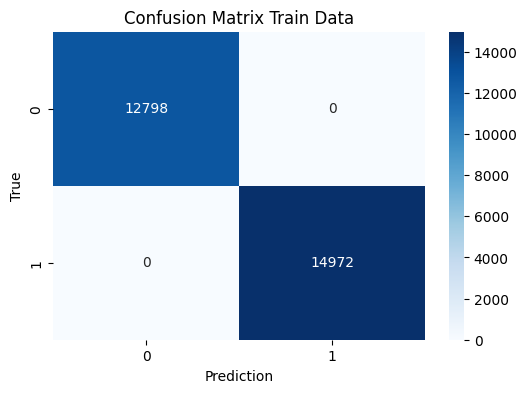

In [36]:
# Make predictions for train set
y_pred_train = clf.predict(X_train)

#confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_train, annot=True, cmap="Blues", fmt="d", cbar=True)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix Train Data')
plt.show()

In [37]:
#scores
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Test:", accuracy)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Training:", accuracy)

f1 = f1_score(y_test, y_pred)
print("F1 Test:", f1)

f1 = f1_score(y_train, y_pred_train)
print("F1 Training:", f1)

precision = precision_score(y_test, y_pred)
print("Precision Test:", precision)

precision = precision_score(y_train, y_pred_train)
print("Precision Training:", precision)

recall = recall_score(y_test, y_pred)
print("Recall Test:", recall)

recall = recall_score(y_train, y_pred_train)
print("Recall Training:", recall)

Accuracy Test: 0.9074287359631442
Accuracy Training: 1.0
F1 Test: 0.9146195724339397
F1 Training: 1.0
Precision Test: 0.917910447761194
Precision Training: 1.0
Recall Test: 0.9113522095792538
Recall Training: 1.0


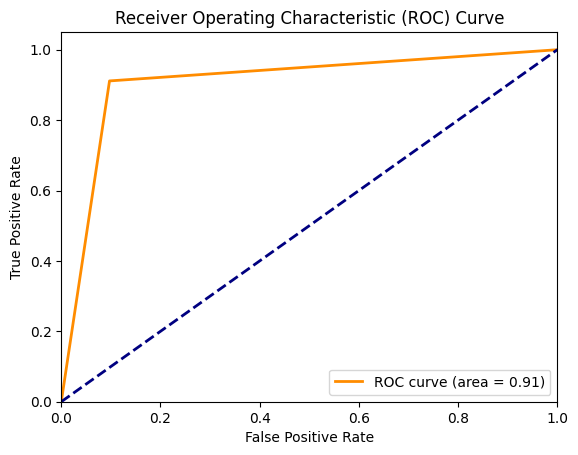

In [38]:
# ROC Curve
y_pred_roc = clf.predict_proba(X_test)[:, 1] # Probability of positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_roc)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [40]:
# Save model
with open('./model/model_dectree.pkl', 'wb') as file:
    pickle.dump(clf, file)

## Feature Importance

In [47]:
# Abrufen der Feature Importance
importances = clf.feature_importances_

# Ausgabe der Feature Importance
for feature, importance in zip(df_train.columns, importances):
    print(f"{feature}: {importance}")

gender_M: 0.0018331108915033154
gender_Unknown: 3.936712108693294e-05
region_category_Town: 0.002109586522238449
region_category_Unknown: 0.001127822390668284
region_category_Village: 0.0021659038625433565
joined_through_referral_Unknown: 0.001935511679569951
joined_through_referral_Yes: 0.002119646341371278
preferred_offer_types_Gift Vouchers/Coupons: 0.0025797641604200583
preferred_offer_types_Without Offers: 0.001100207617057888
medium_of_operation_Both: 0.0006861694236305692
medium_of_operation_Desktop: 0.0007457790968451559
medium_of_operation_Smartphone: 0.0019692362090908107
internet_option_Mobile_Data: 0.0017377800317486829
internet_option_Wi-Fi: 0.0022280094318237556
used_special_discount_Yes: 0.00254125211650616
complaint_status_Not Applicable: 0.001241237213422108
complaint_status_Solved: 0.001835765250156464
complaint_status_Solved in Follow-up: 0.001324157512975032
complaint_status_Unsolved: 0.0010297778468156117
feedback_Poor Customer Service: 0.0012019184172971634
feedba

In [50]:
print(features)

Index(['gender_M', 'gender_Unknown', 'region_category_Town',
       'region_category_Unknown', 'region_category_Village',
       'joined_through_referral_Unknown', 'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'used_special_discount_Yes', 'complaint_status_Not Applicable',
       'complaint_status_Solved', 'complaint_status_Solved in Follow-up',
       'complaint_status_Unsolved', 'feedback_Poor Customer Service',
       'feedback_Poor Product Quality', 'feedback_Poor Website',
       'feedback_Products always in Stock', 'feedback_Quality Customer Care',
       'feedback_Reasonable Price', 'feedback_Too many ads',
       'feedback_User Friendly Website', 'age', 'membership_category',
       'days_since_last_login', 'avg_time_spent', '

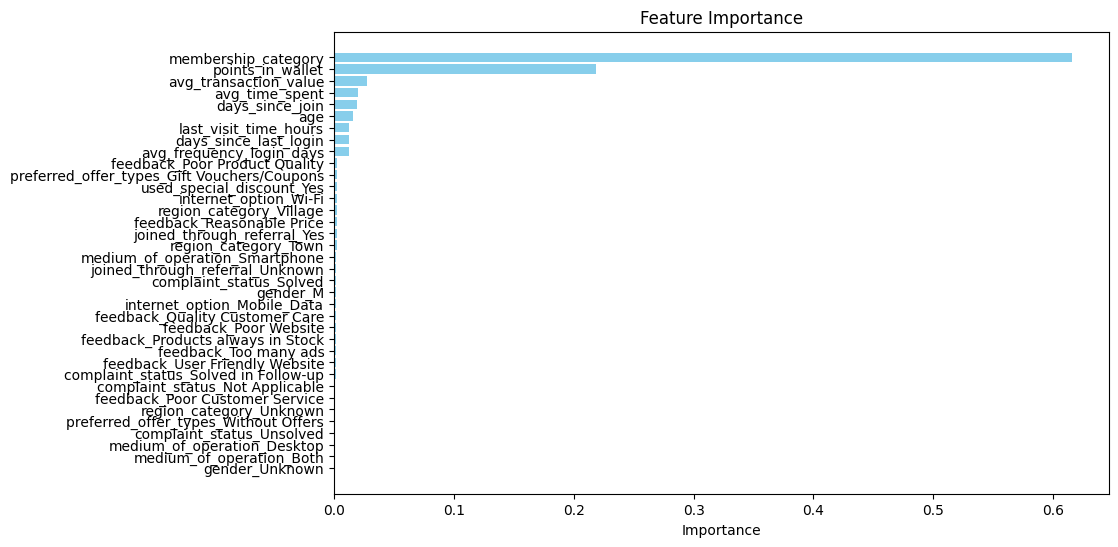

In [62]:
#feature importance

importances = clf.feature_importances_
features = X_train.columns


# create data frame for handling importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# sort by importances
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# create Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

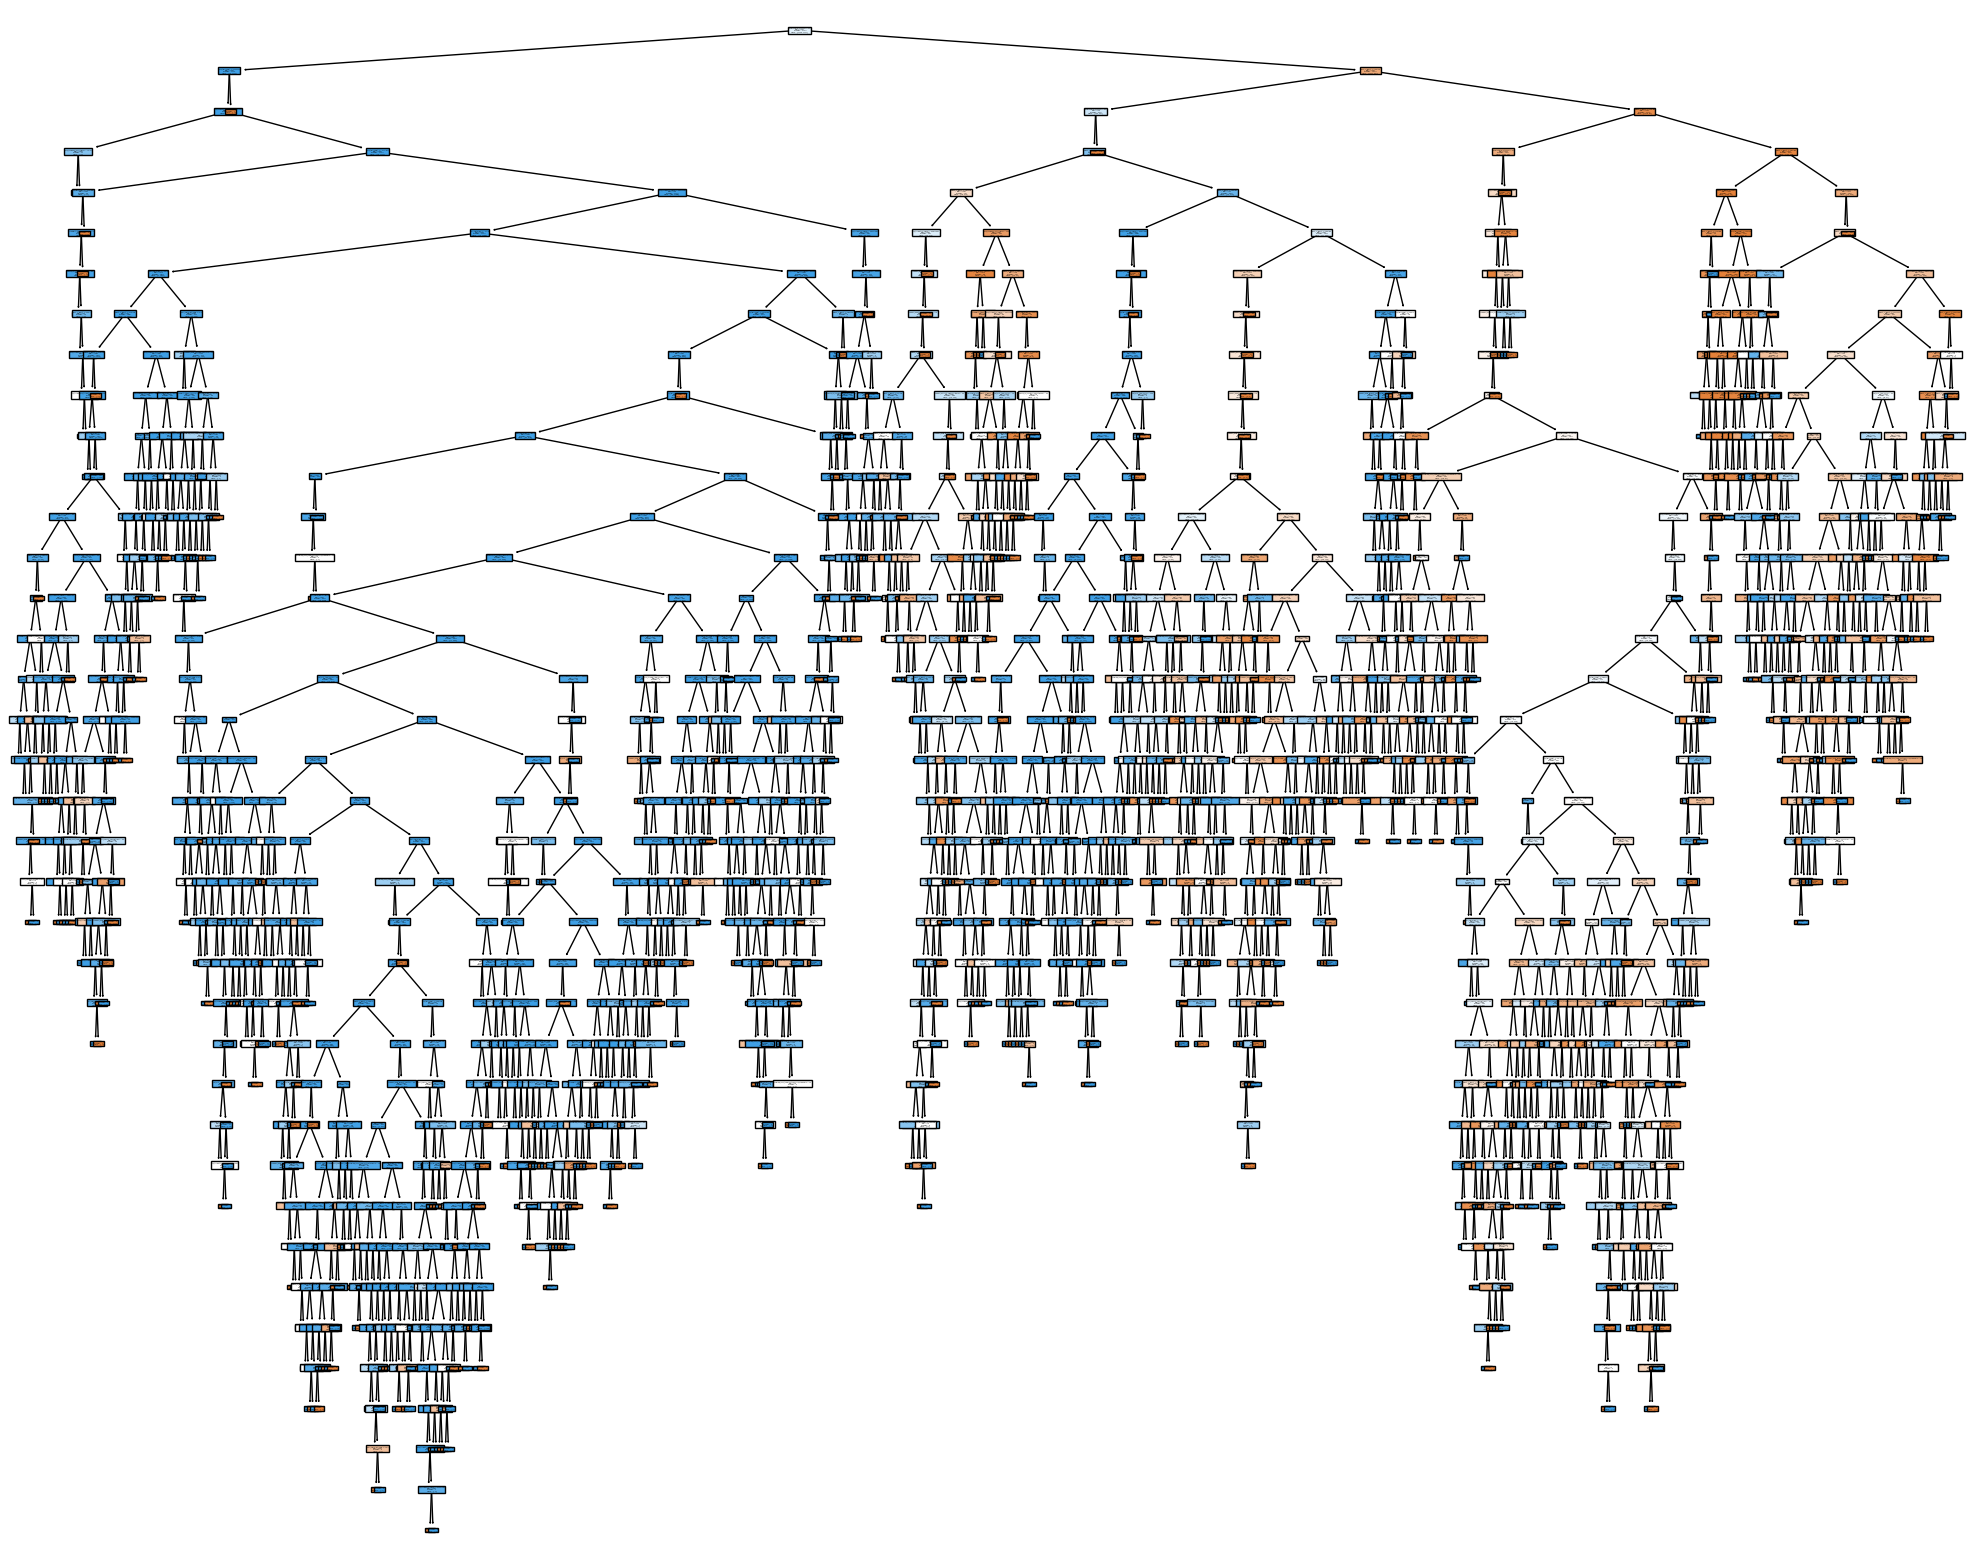

In [63]:
fig = plt.figure(figsize=(25,20))
dectree_plot = plot_tree(clf,feature_names=features, filled=True)

# You can export the graphic with the following command
# plt.savefig('decision_tree')


TODO: look at hyperparameters because of overfitting